In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import entropy


In [2]:
df=pd.read_csv('/content/electricity_bill_dataset.csv')

In [3]:
df.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


In [4]:
df.isnull().sum()

,0
Fan,0
Refrigerator,0
AirConditioner,0
Television,0
Monitor,0
MotorPump,0
Month,0
City,0
Company,0
MonthlyHours,0


In [5]:
df = pd.get_dummies(df, drop_first=True)


In [7]:
X = df.drop(columns=["ElectricityBill"])
y = df["ElectricityBill"]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion="squared_error", random_state=42)
regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [12]:
y_pred = regressor.predict(X_test)

In [13]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared Score (R²): {r2}")

Mean Absolute Error (MAE): 1.7840555739332566
Mean Squared Error (MSE): 90.93316572940813
R-Squared Score (R²): 0.9999201933910155


In [14]:
print(y.dtype)
print(y.unique())

float64
[3225.6 3806.4 3203.2 ... 7038.  7318.5 6035.6]


In [15]:
y = pd.cut(y, bins=[0, 100, 200, 300], labels=["Low", "Medium", "High"])  # Example binning


In [20]:
clf = DecisionTreeRegressor(random_state=42)  # Use Regressor, not Classifier
clf.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

<ipython-input-24-ec1d640f7360>:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to fit labels properly


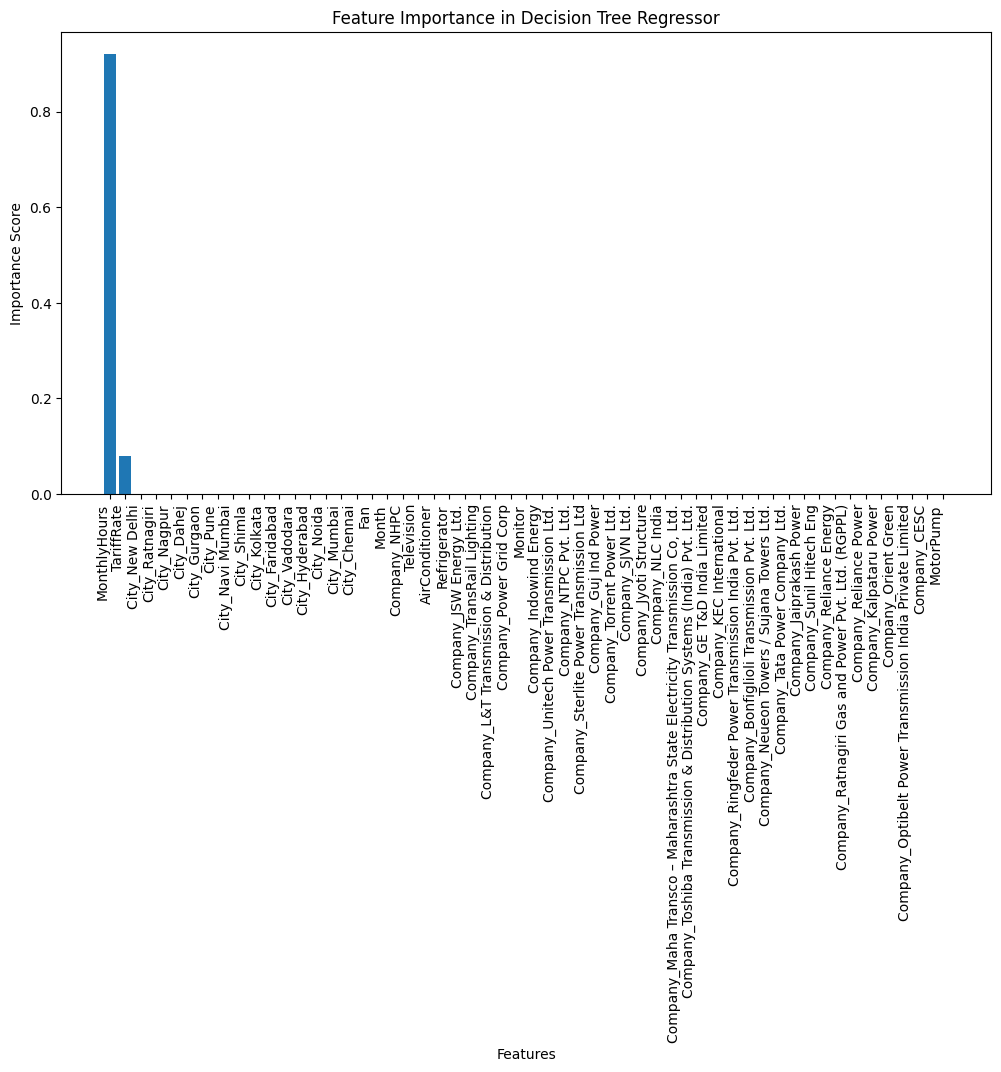

In [24]:
plt.figure(figsize=(12, 6))  # Increase figure size
plt.title("Feature Importance in Decision Tree Regressor")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90, ha="right")  # Rotate labels for better visibility
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()  # Adjust layout to fit labels properly
plt.show()


In [25]:
def calculate_entropy(y):
    _, class_counts = np.unique(y, return_counts=True)
    probabilities = class_counts / len(y)
    return entropy(probabilities, base=2)


In [26]:
calculate_entropy(y)

np.float64(15.468655859236225)